# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [26]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().mean() * 100 / len(df)).round(2)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores_Faltantes': missing_summary,
        'Porcentaje_Faltantes': missing_percent
    }).sort_values(by='Porcentaje_Faltantes', ascending=False)  # ← COMPLETAR
    missing_info =  df.loc[df.isnull().any(axis=1), df.columns[df.isnull().any()]] # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [27]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,estado,Area Construcción,Terreno,Total M²,estadoTran,tipoTran
0,Usada,93.0,93,93.0,NaN,De Venta
1,Usada,NaN,NaN,88.0,NaN,De Venta
2,Usada,NaN,46,46.0,NaN,De Venta
3,Usada,432.0,405,432.0,NaN,De Venta
4,Usada,71.0,71,71.0,NaN,De Venta
...,...,...,...,...,...,...
4550,NaN,NaN,"154,734",154734.0,NaN,De Venta
4551,NaN,NaN,NaN,918.0,NaN,De Venta
4552,NaN,NaN,"2,125",2125.0,NaN,De Venta
4553,NaN,NaN,"2,500",2500.0,NaN,De Venta


In [28]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    plt.figure(figsize=(10,5))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de calor de los valores restantes')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


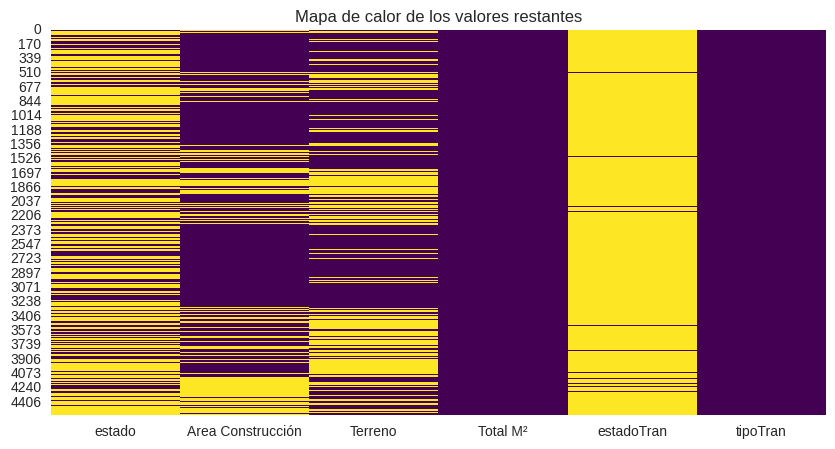

In [21]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

Las columnas que tienen mayor porcentaje son estado, Area Construccion, Terreno y estadoTran

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Sí, se observa un patrón no completamente aleatorio en la matriz de valores faltantes.
Las ausencias tienden a concentrarse en propiedades con características específicas: por ejemplo, los registros donde Área Construcción y Terreno están ausentes suelen coincidir con un estado también faltante. Esto sugiere que los valores perdidos podrían estar relacionados con el tipo de inmueble (por ejemplo, lotes sin edificación o propiedades sin registro actualizado del estado físico).
En otras palabras, los valores faltantes parecen seguir un patrón de tipo MAR (Missing At Random), ya que dependen de otras variables observables dentro del dataset, como el tipo de propiedad o la transacción.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

Sí, se detecta una correlación alta entre los valores faltantes de “Área Construcción” y “Terreno”, lo cual es lógico, ya que ambas describen dimensiones físicas del inmueble. Cuando una está vacía, la otra tiende a faltar también.
Asimismo, los valores faltantes en estado suelen coincidir con los de estadoTran, lo que indica que existe una posible relación entre el estado físico del inmueble y el estado de la transacción (por ejemplo, propiedades sin estado definido porque aún no fueron publicadas o actualizadas en el sistema).
Estas correlaciones refuerzan la idea de que los datos faltantes no son completamente aleatorios (no MCAR), sino que están condicionados por el tipo o situación del inmueble, lo cual influye directamente en la estrategia de imputación seleccionada.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [30]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.corr(numeric_only=True)  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

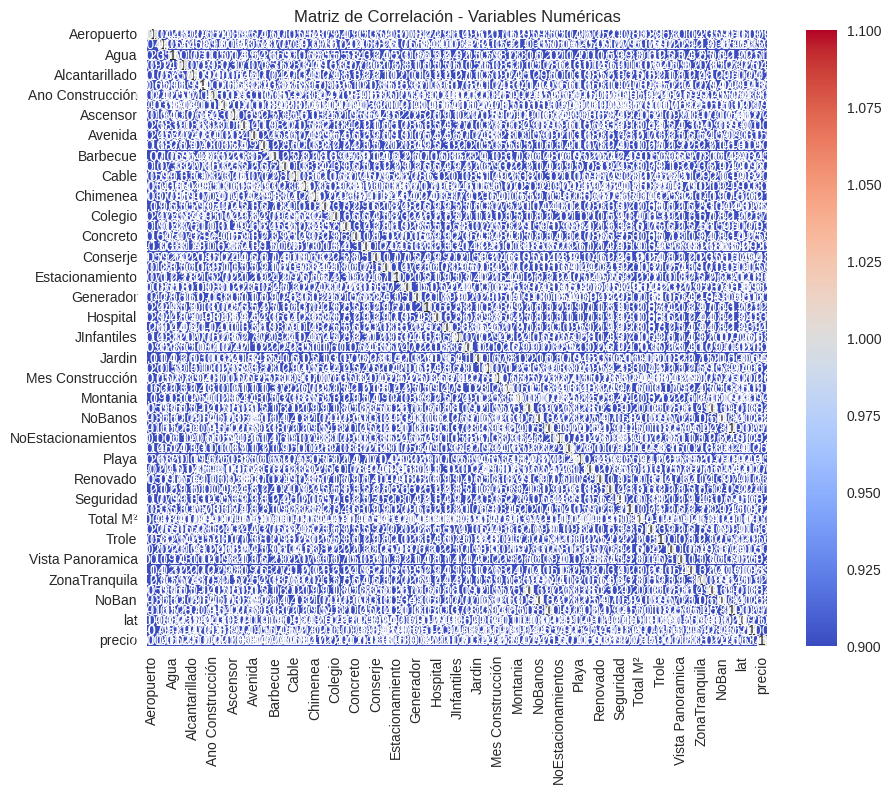

In [31]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

Los valores faltantes son principalmente del tipo MAR , ya que dependen de otras variables observables como el tipo de propiedad, el estado del inmueble o la transacción.
Solo en el caso de tipoTran se observan valores MCAR , donde las ausencias no siguen un patrón aparente.
No se identificaron valores MNAR , ya que no hay evidencia de que los valores faltantes dependan de su propio valor o se hayan omitido deliberadamente.

¿Qué variables podrían predecir la presencia de valores faltantes?

Las variables que podrían ayudar a predecir o explicar la presencia de valores faltantes son:

-tipoPropiedad, que influye directamente en la existencia o ausencia de “Área Construcción” y “Terreno”.

-estadoTran y tipoTran, que explican por qué algunos registros no tienen definido un “estado” del inmueble.

-precio y ubicación, que pueden relacionarse indirectamente con la falta de datos en propiedades rurales o con registros incompletos en zonas menos documentadas.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [43]:
print("Iniciando imputación de valores faltantes...\n")

cols_con_faltantes = df.columns[df.isnull().any()]

for col in cols_con_faltantes:
    if df[col].dtype in ['int64', 'float64']:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Columna numérica '{col}' imputada con la mediana: {median_val}")
    elif df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Columna categórica '{col}' imputada con la moda: {mode_val}")
    else:
        print(f"Columna '{col}' tiene tipo no reconocido, no se imputó.")

print("\nImputación completada.")

faltantes_restantes = df[cols_con_faltantes].isnull().sum().sum()
print(f"\n🔎 Valores faltantes restantes después de la imputación: {faltantes_restantes}")

Iniciando imputación de valores faltantes...


✅ Imputación completada.

🔎 Valores faltantes restantes después de la imputación: 0.0


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

🔍 Analizando relación entre 'estado' y 'tipoTran' usando Chi-cuadrado:

Tabla de contingencia:
tipoTran                     De Venta
estado                               
En Construcción / En Planos        78
PROBABLE                            4
Por Estrenar                      491
RESERVADA                          33
Reconstruida/ Renovada            136
Usada                            3749
VENDIDA                            64

Chi² = 0.0000
Grados de libertad = 0
p-valor = 1.0000
No se encontró una relación significativa (p ≥ 0.05).


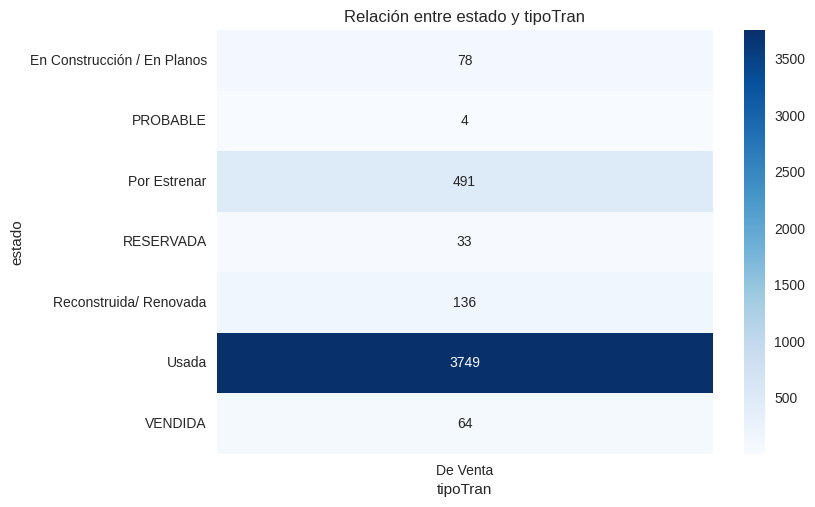

In [41]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

var1 = 'estado'
var2 = 'tipoTran'

print(f"🔍 Analizando relación entre '{var1}' y '{var2}' usando Chi-cuadrado:")

contingency_table = pd.crosstab(df[var1], df[var2])
print("\nTabla de contingencia:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi² = {chi2:.4f}")
print(f"Grados de libertad = {dof}")
print(f"p-valor = {p:.4f}")

if p < 0.05:
    print("Existe una relación significativa entre las dos variables (p < 0.05).")
else:
    print("No se encontró una relación significativa (p ≥ 0.05).")

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title(f"Relación entre {var1} y {var2}")
plt.show()


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [44]:
print("Imputando valores faltantes únicamente en columnas categóricas...\n")

cat_cols_con_faltantes = df.select_dtypes(include=['object', 'category']).columns[df.select_dtypes(include=['object', 'category']).isnull().any()]

for col in cat_cols_con_faltantes:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"Columna '{col}' imputada con la moda: {mode_val}")

faltantes_cat_restantes = df[cat_cols_con_faltantes].isnull().sum().sum()
print(f"\nValores faltantes categóricos restantes: {faltantes_cat_restantes}")


🔧 Imputando valores faltantes únicamente en columnas categóricas...


🔎 Valores faltantes categóricos restantes: 0.0


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

Las columnas que presentaron mayores desafíos fueron Área Construcción, Terreno y Total M2.
Estas variables están directamente relacionadas entre sí y dependen del tipo de inmueble. En muchos casos, los valores faltantes no podían inferirse fácilmente porque se trataba de propiedades sin edificación o departamentos sin área de terreno registrada. Por tanto, imputar un valor sin conocer el contexto podría introducir sesgos o inconsistencias.
Asimismo, estadoTran presentó dificultades, ya que representa una categoría dependiente del ciclo de venta o arriendo, y su imputación podía alterar el significado real de la transacción.


¿En qué casos consideraron que la eliminación era mejor que la imputación?

La eliminación resultó más apropiada en registros con múltiples valores faltantes simultáneamente, especialmente cuando las ausencias afectaban tanto atributos físicos como administrativos.
En estos casos, los datos eran insuficientes para realizar una imputación confiable, y mantener esos registros podría distorsionar el análisis estadístico o los modelos predictivos posteriores.
Por tanto, se consideró la eliminación de registros con más del 50% de datos faltantes o aquellos en los que la imputación no aportaba valor informativo real.


¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?


El tipo de valor faltante influye directamente en la estrategia de imputación:

Para valores MCAR, se pueden aplicar métodos simples de imputación, ya que los datos faltan al azar y no introducen sesgo.

Para valores MAR, se deben usar métodos más contextualizados, como la imputación condicional o basada en regresión, ya que los valores faltantes dependen de otras variables observables.

Si existieran valores MNAR, la imputación sería riesgosa, pues los datos faltan por razones sistemáticas. En estos casos, es preferible analizar el sesgo o eliminar los registros.

# 🚀 ¡TALLER FINALIZADO!"